# Zomato Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("Zomato data.csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [69]:
def handle_rating(value):
    val=str(value).split('/')
    return float(val[0])
df['rate'] = df['rate'].apply(handle_rating)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [35]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [87]:
pd.isna(df).sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

There are **no null values** in the dataset given.

## 1. What type of restaurants do the majority of the customers order from.

In [108]:
counts = df['listed_in(type)'].value_counts()
counts

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

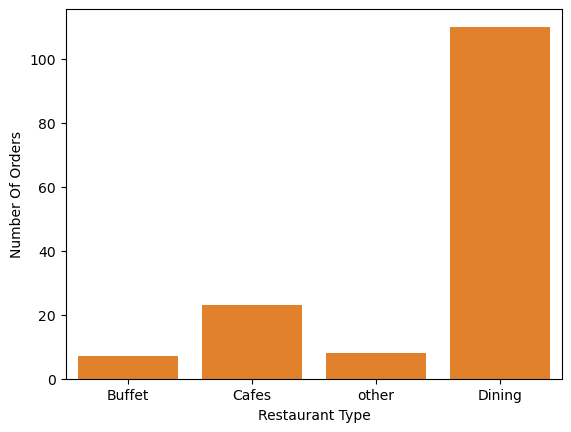

In [126]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Restaurant Type")
plt.ylabel("Number Of Orders")
plt.show()

**Conclusion** : Majority of the customers have ordered from **Dining** restauants

## 2. How many votes has each type of restaurant has received from customers

In [138]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [142]:
votes = df.groupby(['listed_in(type)'])['votes'].sum()
votes

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

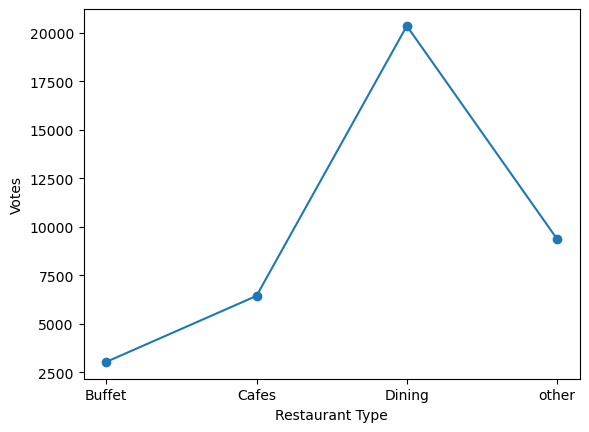

In [162]:
plt.plot(votes,marker="o")
plt.xlabel("Restaurant Type")
plt.ylabel("Votes")
plt.show()

**Conclusion** : **Dining** restaurants have the most number of votes compared to other restaurants.

## 3. What are the ratings that majority of the restaurants recieved.

In [166]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [172]:
ratings = df['rate'].value_counts()
ratings

rate
3.8    20
3.7    15
3.3    14
3.4    12
4.1    11
3.6    11
4.0    10
3.9    10
4.2     8
3.1     7
3.2     7
2.9     7
3.5     6
4.6     2
2.8     2
4.4     2
3.0     2
4.3     1
2.6     1
Name: count, dtype: int64

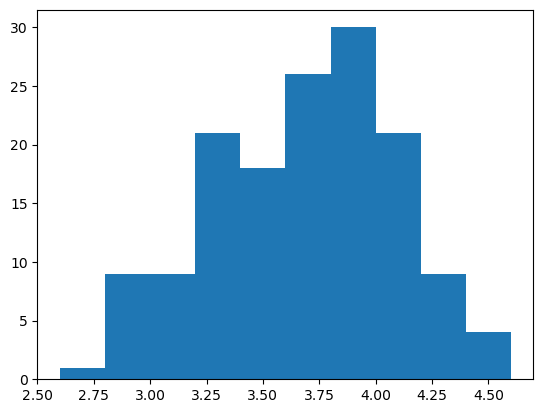

In [182]:
plt.hist(df['rate'], bins=10)
plt.show()

**Conclusion** : Majority of the ratings were from the range **3.75 - 4.00**

## 4. Zomato has observed that most of the couples order most of their food online. What is their average spending on each other.

In [186]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [220]:
cost = df['approx_cost(for two people)'].value_counts().reset_index()
cost

,approx_cost(for two people),count
0,300,23
1,200,16
2,150,16
3,400,15
4,500,14
5,600,13
6,800,12
7,100,6
8,450,6
9,250,6


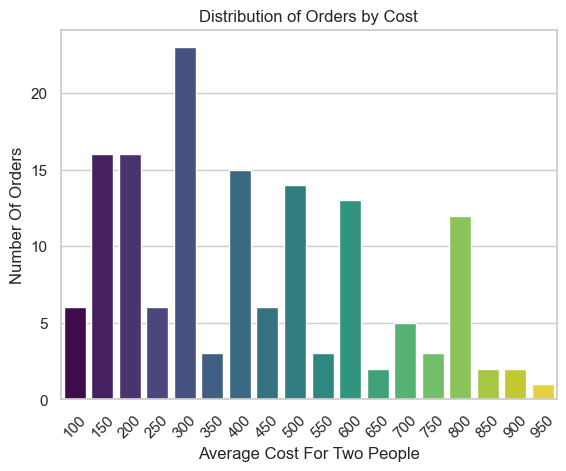

In [250]:
sns.barplot(x='approx_cost(for two people)', y='count', data=cost, hue='approx_cost(for two people)', palette="viridis", legend=False)
plt.xlabel("Average Cost For Two People")
plt.ylabel("Number Of Orders")
plt.title("Distribution of Orders by Cost")
plt.xticks(rotation=45)
plt.show()

**Conclusion** : Average cost for two people is **300 rupees**

## 5. Which mode online or offline has recieved the maximum rating.

In [254]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [268]:
df.groupby(['online_order'])['rate'].mean()

online_order
No     3.487778
Yes    3.858621
Name: rate, dtype: float64

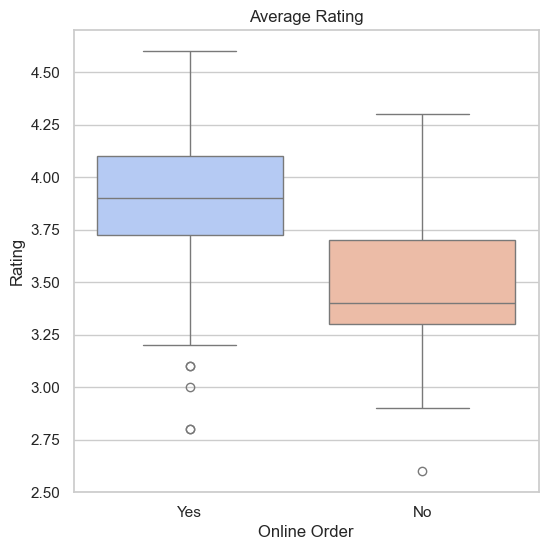

In [284]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order',y='rate',data=df,hue='online_order',palette="coolwarm",legend=False)
plt.title('Average Rating')
plt.xlabel('Online Order')
plt.ylabel("Rating")
plt.show()

**Conclusion** : <br>
Average **Online** rating ranges from **3.75 to 4.15** <br>
Average **Offline** rating ranges from **3.25 to 3.75**
<br>
**Online rating is greater compared to Offline rarting**

## 6. Which type of restaurant received more offline orders, so that Zomato can provide those customers with good offers and make them order online.

In [298]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [321]:
values = df.pivot_table(columns='online_order',index='listed_in(type)',aggfunc='size')
values

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


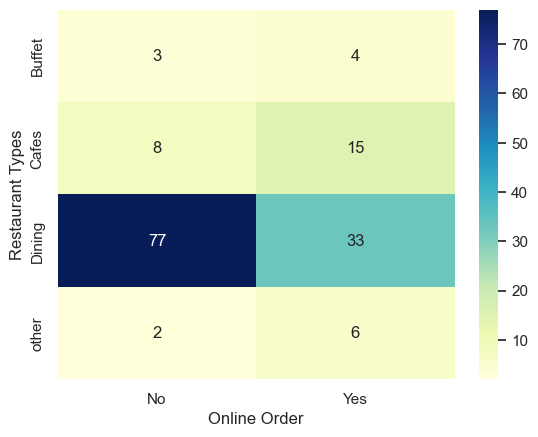

In [339]:
sns.heatmap(data=values,cmap='YlGnBu',annot=True)
plt.xlabel("Online Order")
plt.ylabel("Restaurant Types")
plt.show()

**Conclusion** : From above heatmap we can observe that **Dining Restaurant types have most offline order**s. So Zomato can give those customers various offers to make them order online